In [1]:
%load_ext autoreload
%autoreload 2

import copy
import math
import random
import time
from collections import OrderedDict, defaultdict
from typing import Union, List
from utils import *

import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from torch.optim import *
from torch.optim.lr_scheduler import *
from torch.utils.data import DataLoader
from torchprofile import profile_macs
from torchvision.datasets import *
from torchvision.transforms import *
from tqdm.auto import tqdm
import torchvision.models as models

from torchprofile import profile_macs

assert torch.cuda.is_available(), \
"CUDA support is not available."

/home/soheil/miniconda3/envs/hardwareAcc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [3]:
dataloader = get_dataloader()

Files already downloaded and verified
Files already downloaded and verified


In [4]:
backbone = models.vgg16(pretrained=True)

/home/soheil/miniconda3/envs/hardwareAcc/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/soheil/miniconda3/envs/hardwareAcc/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
model = nn.Sequential(OrderedDict([('backbone', backbone), ('non-linearity', nn.ReLU(inplace=True)),('classifier', nn.Linear(1000, 100))])).cuda()

In [6]:
print(model)

Sequential(
  (backbone): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      

In [7]:
train_accuray, test_accuracy = finetune(model, dataloader, num_finetune_epochs=50, lr=5e-3)

Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 14.63% / Best Accuracy: 14.63%


    Epoch 2 Accuracy 30.24% / Best Accuracy: 30.24%


    Epoch 3 Accuracy 39.00% / Best Accuracy: 39.00%


    Epoch 4 Accuracy 44.23% / Best Accuracy: 44.23%


    Epoch 5 Accuracy 46.55% / Best Accuracy: 46.55%


    Epoch 6 Accuracy 50.18% / Best Accuracy: 50.18%


    Epoch 7 Accuracy 51.51% / Best Accuracy: 51.51%


    Epoch 8 Accuracy 54.46% / Best Accuracy: 54.46%


    Epoch 9 Accuracy 55.61% / Best Accuracy: 55.61%


    Epoch 10 Accuracy 57.03% / Best Accuracy: 57.03%


    Epoch 11 Accuracy 58.00% / Best Accuracy: 58.00%


    Epoch 12 Accuracy 58.90% / Best Accuracy: 58.90%


    Epoch 13 Accuracy 59.09% / Best Accuracy: 59.09%


    Epoch 14 Accuracy 60.37% / Best Accuracy: 60.37%


    Epoch 15 Accuracy 60.68% / Best Accuracy: 60.68%


    Epoch 16 Accuracy 60.99% / Best Accuracy: 60.99%


    Epoch 17 Accuracy 61.85% / Best Accuracy: 61.85%


    Epoch 18 Accuracy 61.80% / Best Accuracy: 61.85%


    Epoch 19 Accuracy 62.25% / Best Accuracy: 62.25%


    Epoch 20 Accuracy 62.97% / Best Accuracy: 62.97%


    Epoch 21 Accuracy 62.71% / Best Accuracy: 62.97%


    Epoch 22 Accuracy 62.75% / Best Accuracy: 62.97%


    Epoch 23 Accuracy 63.05% / Best Accuracy: 63.05%


    Epoch 24 Accuracy 63.73% / Best Accuracy: 63.73%


    Epoch 25 Accuracy 63.88% / Best Accuracy: 63.88%


    Epoch 26 Accuracy 64.43% / Best Accuracy: 64.43%


    Epoch 27 Accuracy 63.93% / Best Accuracy: 64.43%


    Epoch 28 Accuracy 64.19% / Best Accuracy: 64.43%


    Epoch 29 Accuracy 64.55% / Best Accuracy: 64.55%


    Epoch 30 Accuracy 64.61% / Best Accuracy: 64.61%


    Epoch 31 Accuracy 64.09% / Best Accuracy: 64.61%


    Epoch 32 Accuracy 64.52% / Best Accuracy: 64.61%


    Epoch 33 Accuracy 64.36% / Best Accuracy: 64.61%


    Epoch 34 Accuracy 64.68% / Best Accuracy: 64.68%


    Epoch 35 Accuracy 64.28% / Best Accuracy: 64.68%


    Epoch 36 Accuracy 64.37% / Best Accuracy: 64.68%


    Epoch 37 Accuracy 64.30% / Best Accuracy: 64.68%


    Epoch 38 Accuracy 63.49% / Best Accuracy: 64.68%


    Epoch 39 Accuracy 63.73% / Best Accuracy: 64.68%


    Epoch 40 Accuracy 64.97% / Best Accuracy: 64.97%


    Epoch 41 Accuracy 63.86% / Best Accuracy: 64.97%


    Epoch 42 Accuracy 62.78% / Best Accuracy: 64.97%


    Epoch 43 Accuracy 63.94% / Best Accuracy: 64.97%


    Epoch 44 Accuracy 64.77% / Best Accuracy: 64.97%


    Epoch 45 Accuracy 63.61% / Best Accuracy: 64.97%


    Epoch 46 Accuracy 63.66% / Best Accuracy: 64.97%


    Epoch 47 Accuracy 63.88% / Best Accuracy: 64.97%


    Epoch 48 Accuracy 64.37% / Best Accuracy: 64.97%


    Epoch 49 Accuracy 63.42% / Best Accuracy: 64.97%


    Epoch 50 Accuracy 64.79% / Best Accuracy: 64.97%


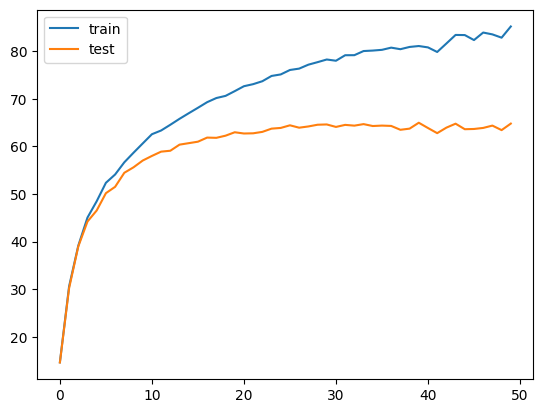

In [8]:
# plot train/test accuracy

plt.plot(train_accuray, label='train')
plt.plot(test_accuracy, label='test')
plt.legend()
plt.show()

In [9]:
evaluate_model(model, dataloader)

model has test accuracy=64.75%
model has train accuracy=85.32%
model has size=528.17 MiB
model has macs=0.44 Gmacs
average inference time is 0.0012 seconds


In [8]:
base_model = copy.deepcopy(model)
# base_test_accuracy = test_accuracy
# base_train_accuracy = train_accuray

In [7]:
# save the model
torch.save(base_model.state_dict(), 'base_model.pth')

NameError: name 'base_model' is not defined

In [7]:
# load the model
model.load_state_dict(torch.load('base_model.pth'))

<All keys matched successfully>

In [17]:
model = copy.deepcopy(base_model)

In [18]:
remove_relu(model, dataloader, nn.ReLU, '4', finetune_epochs=1, lr=5e-4)
print(model)

Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 67.25% / Best Accuracy: 67.25%
Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 67.00% / Best Accuracy: 67.00%
Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 66.90% / Best Accuracy: 66.90%
Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 66.77% / Best Accuracy: 66.77%
Sequential(
  (backbone): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

In [19]:
w3 = model.backbone.classifier[3].weight.data
w6 = model.backbone.classifier[6].weight.data
model.backbone.classifier[6].weight.data = torch.matmul(w6, w3) 

In [20]:
change_module(model=model, old_module=nn.Linear, _number='3', new_module=nn.Identity())
change_module(model=model, old_module=nn.LeakyReLU, _number='4', new_module=nn.Identity())
change_module(model=model, old_module=nn.Dropout, _number='5', new_module=nn.Identity())
print(model)

Sequential(
  (backbone): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      

In [21]:
evaluate_model(model, dataloader)

model has test accuracy=66.80%
model has train accuracy=90.22%
model has size=464.16 MiB
model has macs=0.42 Gmacs
average inference time is 0.0025 seconds
model has 121.68 M parameters


In [22]:
remove_relu(model, dataloader, nn.ReLU, '1', finetune_epochs=1, lr=5e-4)

Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 66.79% / Best Accuracy: 66.79%
Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 66.44% / Best Accuracy: 66.44%
Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 65.38% / Best Accuracy: 65.38%
Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 64.62% / Best Accuracy: 64.62%


In [23]:
w0 = model.backbone.classifier[0].weight.data
w6 = model.backbone.classifier[6].weight.data
model.backbone.classifier[6].weight.data = torch.matmul(w6, w0)
change_module(model=model, old_module=nn.Linear, _number='0', new_module=nn.Identity())
change_module(model=model, old_module=nn.LeakyReLU, _number='1', new_module=nn.Identity())
change_module(model=model, old_module=nn.Dropout, _number='2', new_module=nn.Identity())
print(model)

Sequential(
  (backbone): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      

In [24]:
evaluate_model(model, dataloader)

model has test accuracy=65.08%
model has train accuracy=89.47%
model has size=152.22 MiB
model has macs=0.34 Gmacs
average inference time is 0.0015 seconds
model has 39.90 M parameters


In [26]:
remove_relu2(model, dataloader, nn.ReLU, '1', finetune_epochs=1, lr=5e-4)
print(model)

Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 65.43% / Best Accuracy: 65.43%
Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 65.67% / Best Accuracy: 65.67%
Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 65.51% / Best Accuracy: 65.51%
Finetuning Fine-grained Pruned Sparse Model


    Epoch 1 Accuracy 64.87% / Best Accuracy: 64.87%
Sequential(
  (backbone): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

In [28]:
w6 = model.backbone.classifier[6].weight.data
classofier = model.classifier.weight.data
model._modules["classifier"] = nn.Linear(25088, 100, bias=True)
model.classifier.weight.data = torch.matmul(classofier, w6)
change_module2(model=model, old_module=nn.LeakyReLU, _number='0', new_module=nn.Identity())
change_module(model=model, old_module=nn.Linear, _number='6', new_module=nn.Identity())

In [38]:
print(model)

Sequential(
  (backbone): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      

In [44]:
model.cuda()
evaluate_model(model, dataloader)

model has test accuracy=64.90%
model has train accuracy=88.72%
model has size=65.70 MiB
model has macs=0.32 Gmacs
average inference time is 0.0012 seconds
model has 17.22 M parameters


In [45]:
evaluate_model(base_model, dataloader)

model has test accuracy=66.14%
model has train accuracy=87.17%
model has size=528.17 MiB
model has macs=0.44 Gmacs
average inference time is 0.0027 seconds
model has 138.46 M parameters


In [49]:
for name, param in model.named_parameters():
    if param.dim()> 1:
        print(name)

backbone.features.0.weight
backbone.features.2.weight
backbone.features.5.weight
backbone.features.7.weight
backbone.features.10.weight
backbone.features.12.weight
backbone.features.14.weight
backbone.features.17.weight
backbone.features.19.weight
backbone.features.21.weight
backbone.features.24.weight
backbone.features.26.weight
backbone.features.28.weight
classifier.weight


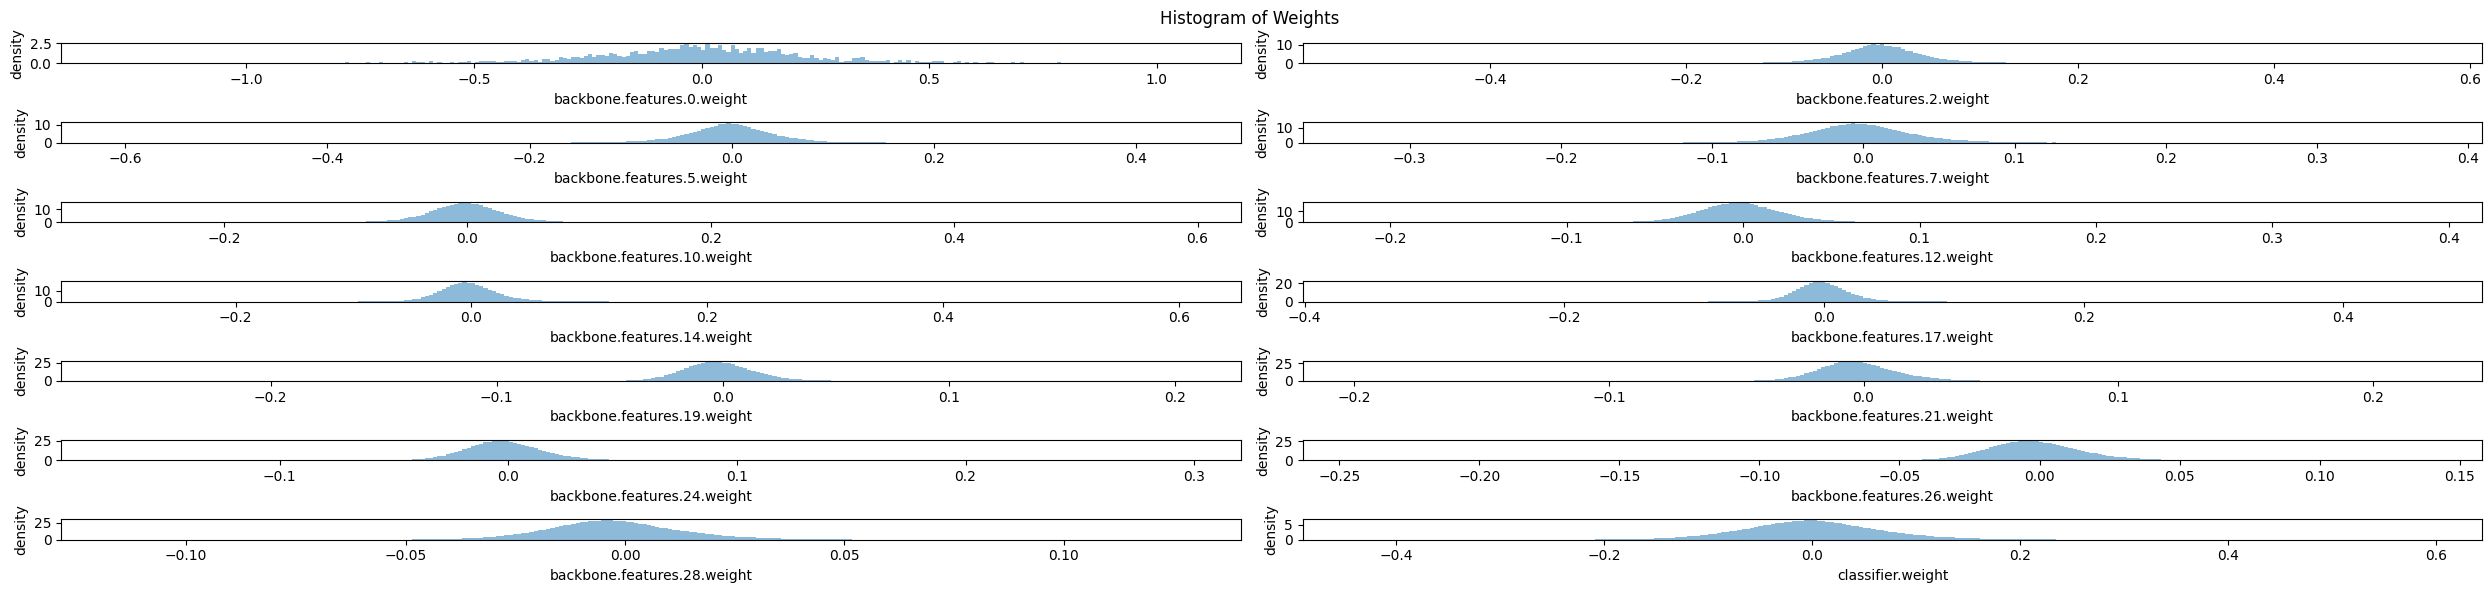

In [51]:
def plot_weight_distribution(model, bins=256, count_nonzero_only=False):
    fig, axes = plt.subplots(7,2, figsize=(25, 6))
    axes = axes.ravel()
    plot_index = 0
    for name, param in model.named_parameters():
        if param.dim() > 1:
            ax = axes[plot_index]
            if count_nonzero_only:
                param_cpu = param.detach().view(-1).cpu()
                param_cpu = param_cpu[param_cpu != 0].view(-1)
                ax.hist(param_cpu, bins=bins, density=True, 
                        alpha = 0.5)
            else:
                ax.hist(param.detach().view(-1).cpu(), bins=bins, density=True, 
                        alpha = 0.5)
            ax.set_xlabel(name)
            ax.set_ylabel('density')
            plot_index += 1
    fig.suptitle('Histogram of Weights')
    fig.tight_layout()
    fig.subplots_adjust(top=0.925)
    plt.show()

plot_weight_distribution(model)

In [52]:
# save the model
torch.save(model.state_dict(), 'model.pth')

In [53]:
evaluate_model(model, dataloader)

model has test accuracy=64.90%
model has train accuracy=88.72%
model has size=65.70 MiB
model has macs=0.32 Gmacs
average inference time is 0.0012 seconds
model has 17.22 M parameters


In [55]:
evaluate_model(base_model, dataloader)

model has test accuracy=66.14%
model has train accuracy=87.21%
model has size=528.17 MiB
model has macs=0.44 Gmacs
average inference time is 0.0012 seconds
model has 138.46 M parameters
